# Merging DataFrames with pandas

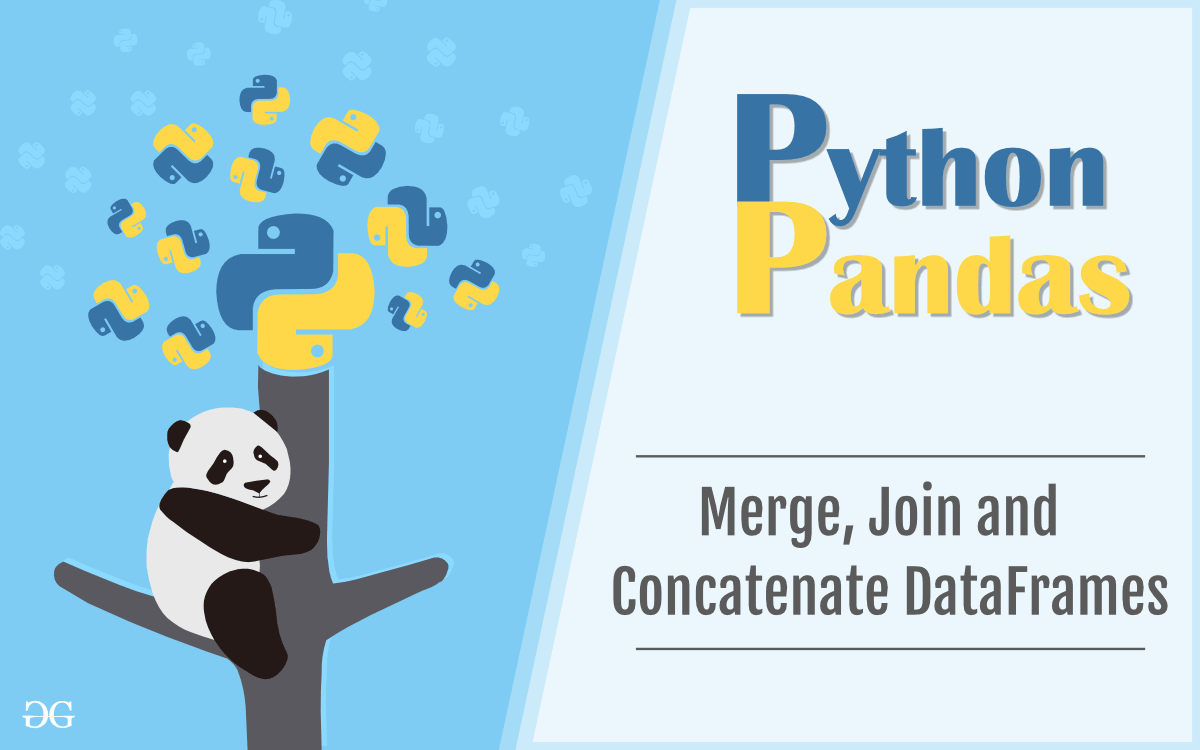

In [1]:
from IPython.display import Image
Image('F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Merging DataFrames with pandas.png')

# Course Description
As a data scientist, you'll often find that the data you need is not in a single file. It may be spread across a number of text files, spreadsheets, or databases. You’ll want to be able to import the data you’re interested in as a collection of DataFrames and combine them to answer your central questions. This course is all about the act of combining—or merging—DataFrames, an essential part of any data scientist's toolbox. You'll hone your pandas skills by learning how to organize, reshape, and aggregate multiple datasets to answer your specific questions.

# 1. Preparing data
In this chapter, you'll learn about different techniques you can use to import multiple files into DataFrames. Having imported your data into individual DataFrames, you'll then learn how to share information between DataFrames using their indexes. Understanding how indexes work is essential to merging DataFrames, which you’ll learn later in the course.

In [ ]:
Reading DataFrames from multiple files
When data is spread among several files, you usually invoke pandas' read_csv() (or a similar data import function)
multiple times to load the data into several DataFrames.
The data files for this example have been derived from a list of Olympic medals awarded between 1896 & 2008 compiled
by the Guardian.
The column labels of each DataFrame are NOC, Country, & Total where NOC is a three-letter code for the name of the country 
and Total is the number of medals of that type won (bronze, silver, or gold).

INSTRUCTIONS

Import pandas as pd.
Read the file 'Bronze.csv' into a DataFrame called bronze.
Read the file 'Silver.csv' into a DataFrame called silver.
Read the file 'Gold.csv' into a DataFrame called gold.
Print the first 5 rows of the DataFrame gold. This has been done for you, so hit 'Submit Answer' to see the results.


In [2]:
bronze1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Bronze.csv'
gold1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Gold.csv'
silver1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Silver.csv'

In [3]:
# Import pandas
import pandas as pd

# Read 'Bronze.csv' into a DataFrame: bronze
bronze = pd.read_csv(bronze1)

# Read 'Silver.csv' into a DataFrame: silver
silver = pd.read_csv(silver1)

# Read 'Gold.csv' into a DataFrame: gold
gold = pd.read_csv(gold1)

# Print the first five rows of gold
print(gold.head())


   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [ ]:
Reading DataFrames from multiple files in a loop

As you saw in the video, loading data from multiple files into DataFrames is more efficient in a loop or a list comprehension.
Notice that this approach is not restricted to working with CSV files. That is, even if your data comes in other formats, 
as long as pandas has a suitable data import function, you can apply a loop or comprehension to generate a list of DataFrames 
imported from the source files.

Here, you'll continue working with The Guardian's Olympic medal dataset.

INSTRUCTIONS

Create a list of file names called filenames with three strings 'Gold.csv', 'Silver.csv', & 'Bronze.csv'. This has been done 
for you.
Use a for loop to create another list called dataframes containing the three DataFrames loaded from filenames:
Iterate over filenames.
Read each CSV file in filenames into a DataFrame and append it to dataframes by using pd.read_csv() inside a call to .append().
Print the first 5 rows of the first DataFrame of the list dataframes. This has been done for you, so hit 'Submit Answer' to see
the results.

In [4]:
# Create the list of file names: filenames
filenames = [gold1, silver1, bronze1]

# Create the list of three DataFrames: dataframes
dataframes = []
for filename in filenames:
    dataframes.append(pd.read_csv(filename))

# Print top 5 rows of 1st DataFrame in dataframes
print(dataframes[0].head())

   NOC         Country   Total
0  USA   United States  2088.0
1  URS    Soviet Union   838.0
2  GBR  United Kingdom   498.0
3  FRA          France   378.0
4  GER         Germany   407.0


In [ ]:
Combining DataFrames from multiple data files

In this exercise, you'll combine the three DataFrames from earlier exercises - gold, silver, & bronze - into a single DataFrame
called medals. The approach you'll use here is clumsy. Later on in the course, you'll see various powerful methods that are 
frequently used in practice for concatenating or merging DataFrames.
Remember, the column labels of each DataFrame are NOC, Country, and Total, where NOC is a three-letter code for the name of
the country and Total is the number of medals of that type won.

INSTRUCTIONS

Construct a copy of the DataFrame gold called medals using the .copy() method.
Create a list called new_labels with entries 'NOC', 'Country', & 'Gold'. This is the same as the column labels from gold with 
the column label 'Total' replaced by 'Gold'.
Rename the columns of medals by assigning new_labels to medals.columns.
Create new columns 'Silver' and 'Bronze' in medals using silver['Total'] & bronze['Total'].
Print the top 5 rows of the final DataFrame medals. This has been done for you, so hit 'Submit Answer' to see the result!


In [5]:
# Make a copy of gold: medals
medals = gold.copy()

# Create list of new column labels: new_labels
new_labels = ['NOC', 'Country', 'Gold']

# Rename the columns of medals using new_labels
medals.columns = new_labels

# Add columns 'Silver' & 'Bronze' to medals
medals['Silver'] = silver['Total']
medals['Bronze'] = bronze['Total']

# Print the head of medals
print(medals.head())

   NOC         Country    Gold  Silver  Bronze
0  USA   United States  2088.0  1195.0  1052.0
1  URS    Soviet Union   838.0   627.0   584.0
2  GBR  United Kingdom   498.0   591.0   505.0
3  FRA          France   378.0   461.0   475.0
4  GER         Germany   407.0   350.0   454.0


In [ ]:
Sorting DataFrame with the Index & columns
It is often useful to rearrange the sequence of the rows of a DataFrame by sorting. You don't have to implement these yourself;
the principal methods for doing this are .sort_index() and .sort_values().
In this exercise, you'll use these methods with a DataFrame of temperature values indexed by month names. You'll sort the rows
alphabetically using the Index and numerically using a column. Notice, for this data, the original ordering is probably most 
useful and intuitive: the purpose here is for you to understand what the sorting methods do.

INSTRUCTIONS

Read 'monthly_max_temp.csv' into a DataFrame called weather1 with 'Month' as the index.
Sort the index of weather1 in alphabetical order using the .sort_index() method and store the result in weather2.
Sort the index of weather1 in reverse alphabetical order by specifying the additional keyword argument
ascending=False inside .sort_index().
Use the .sort_values() method to sort weather1 in increasing numerical order according to the values of 
the column 'Max TemperatureF'.


In [6]:
url = 'https://raw.githubusercontent.com/ksatola/Data-Science-Notes/master/data/dc10/monthly_max_temp.csv'

In [7]:
# Import pandas
import pandas as pd

# Read 'monthly_max_temp.csv' into a DataFrame: weather1
weather1 = pd.read_csv(url, index_col='Month')

# Print the head of weather1
print(weather1.head())

# Sort the index of weather1 in alphabetical order: weather2
weather2 = weather1.sort_index()

# Print the head of weather2
print(weather2.head())

# Sort the index of weather1 in reverse alphabetical order: weather3
weather3 = weather1.sort_index(ascending=False)

# Print the head of weather3
print(weather3.head())

# Sort weather1 numerically using the values of 'Max TemperatureF': weather4
weather4 = weather1.sort_values('Max TemperatureF')

# Print the head of weather4
print(weather4.head())

       Max TemperatureF
Month                  
Jan                  68
Feb                  60
Mar                  68
Apr                  84
May                  88
       Max TemperatureF
Month                  
Apr                  84
Aug                  86
Dec                  68
Feb                  60
Jan                  68
       Max TemperatureF
Month                  
Sep                  90
Oct                  84
Nov                  72
May                  88
Mar                  68
       Max TemperatureF
Month                  
Feb                  60
Jan                  68
Mar                  68
Dec                  68
Nov                  72


In [ ]:
Reindexing DataFrame from a list

Sorting methods are not the only way to change DataFrame Indexes. There is also the .reindex() method.
In this exercise, you'll reindex a DataFrame of quarterly-sampled mean temperature values to contain monthly samples 
(this is an example of upsampling or increasing the rate of samples, which you may recall from the pandas Foundations course).

The original data has the first month's abbreviation of the quarter (three-month interval) on the Index, namely Apr, Jan, Jul,
and Sep. This data has been loaded into a DataFrame called weather1 and has been printed in its entirety in the IPython Shell.

Notice it has only four rows (corresponding to the first month of each quarter) and that the rows are not sorted chronologically.
You'll initially use a list of all twelve month abbreviations and subsequently apply the .ffill() method to forward-fill 
the null entries when upsampling. This list of month abbreviations has been pre-loaded as year.

INSTRUCTIONS

Reorder the rows of weather1 using the .reindex() method with the list year as the argument, which contains the abbreviations 
for each month.
Reorder the rows of weather1 just as you did above, this time chaining the .ffill() method to replace the null values with
the last preceding non-null value.


In [52]:
monthly_max_temp = {'Month': ['Jan', 'Apr', 'Jul', 'Oct'],
                    'Max TemperatureF': [32.13333, 61.956044, 68.934783, 43.434783]}
weather1 = pd.DataFrame.from_dict(monthly_max_temp)
weather1.set_index('Month', inplace=True)

year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [53]:
# Import pandas
import pandas as pd

# Reindex weather1 using the list year: weather2
weather2 = weather1.reindex(year)

# Print weather2
print(weather2)

# Reindex weather1 using the list year with forward-fill: weather3
weather3 = weather1.reindex(year).ffill()

# Print weather3
print(weather3)

       Max TemperatureF
Month                  
Jan           32.133330
Feb                 NaN
Mar                 NaN
Apr           61.956044
May                 NaN
Jun                 NaN
Jul           68.934783
Aug                 NaN
Sep                 NaN
Oct           43.434783
Nov                 NaN
Dec                 NaN
       Max TemperatureF
Month                  
Jan           32.133330
Feb           32.133330
Mar           32.133330
Apr           61.956044
May           61.956044
Jun           61.956044
Jul           68.934783
Aug           68.934783
Sep           68.934783
Oct           43.434783
Nov           43.434783
Dec           43.434783


In [ ]:
Reindexing using another DataFrame Index

Another common technique is to reindex a DataFrame using the Index of another DataFrame. The DataFrame .reindex() method can 
accept the Index of a DataFrame or Series as input. You can access the Index of a DataFrame with its .index attribute.

The Baby Names Dataset from data.gov summarizes counts of names (with genders) from births registered in the US since 1881.
In this exercise, you will start with two baby-names DataFrames names_1981 and names_1881 loaded for you.

The DataFrames names_1981 and names_1881 both have a MultiIndex with levels name and gender giving unique labels to counts 
in each row. If you're interested in seeing how the MultiIndexes were set up, names_1981 and names_1881 were read in using 
the following commands:
    
names_1981 = pd.read_csv('names1981.csv', header=None, names=['name','gender','count'], index_col=(0,1))
names_1881 = pd.read_csv('names1881.csv', header=None, names=['name','gender','count'], index_col=(0,1))

As you can see by looking at their shapes, which have been printed in the IPython Shell, the DataFrame corresponding to 1981 
births is much larger, reflecting the greater diversity of names in 1981 as compared to 1881.

Your job here is to use the DataFrame .reindex() and .dropna() methods to make a DataFrame common_names counting names 
from 1881 that were still popular in 1981.

INSTRUCTIONS

Create a new DataFrame common_names by reindexing names_1981 using the Index of the DataFrame names_1881 of older names.
Print the shape of the new common_names DataFrame. This has been done for you. It should be the same as that of names_1881.
Drop the rows of common_names that have null counts using the .dropna() method. 
These rows correspond to names that fell out of fashion between 1881 & 1981.
Print the shape of the reassigned common_names DataFrame. This has been done for you, so hit 'Submit Answer' to see the result!

In [9]:
path1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Baby names\\names1881.csv'
path2 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Baby names\\names1981.csv'
names_1881 = pd.read_csv(path1)
names_1981 = pd.read_csv(path2)

In [10]:
# Import pandas
import pandas as pd

# Reindex names_1981 with index of names_1881: common_names
common_names = names_1981.reindex(names_1881.index)

# Print shape of common_names
print(common_names.shape)

# Drop rows with null counts: common_names
common_names = common_names.dropna()

# Print shape of new common_names
print(common_names.shape)

(1934, 3)
(1934, 3)


In [ ]:
Broadcasting in arithmetic formulas

In this exercise, you'll work with weather data pulled from wunderground.com. The DataFrame weather has been pre-loaded along 
with pandas as pd. It has 365 rows (observed each day of the year 2013 in Pittsburgh, PA) and 22 columns reflecting different
weather measurements each day.

You'll subset a collection of columns related to temperature measurements in degrees Fahrenheit, convert them to degrees Celsius, 
and relabel the columns of the new DataFrame to reflect the change of units.

Remember, ordinary arithmetic operators (like +, -, *, and /) broadcast scalar values to conforming DataFrames when combining 
scalars & DataFrames in arithmetic expressions. Broadcasting also works with pandas Series and NumPy arrays.

INSTRUCTIONS

Create a new DataFrame temps_f by extracting the columns 'Min TemperatureF', 'Mean TemperatureF', & 'Max TemperatureF'
from weather as a new DataFrame temps_f. To do this, pass the relevant columns as a list to weather[].

Create a new DataFrame temps_c from temps_f using the formula (temps_f - 32) * 5/9.

Rename the columns of temps_c to replace 'F' with 'C' using the .str.replace('F', 'C') method on temps_c.columns.

Print the first 5 rows of DataFrame temps_c. This has been done for you, so hit 'Submit Answer' to see the result!

In [11]:
url = 'https://assets.datacamp.com/production/repositories/516/datasets/58c1ead59818b2451324e9e84239db7bda6b11d3/pittsburgh2013.csv'
weather = pd.read_csv(url)
weather.shape

(365, 23)

In [12]:
# Extract selected columns from weather as new DataFrame: temps_f
temps_f = weather[['Min TemperatureF', 'Mean TemperatureF', 'Max TemperatureF']]

# Convert temps_f to celsius: temps_c
temps_c = (temps_f - 32) * 5/9

# Rename 'F' in column names with 'C': temps_c.columns
temps_c.columns = temps_c.columns.str.replace('F', 'C')

# Print first 5 rows of temps_c
print(temps_c.head())

   Min TemperatureC  Mean TemperatureC  Max TemperatureC
0         -6.111111          -2.222222          0.000000
1         -8.333333          -6.111111         -3.888889
2         -8.888889          -4.444444          0.000000
3         -2.777778          -2.222222         -1.111111
4         -3.888889          -1.111111          1.111111


In [ ]:
Computing percentage growth of GDP

Your job in this exercise is to compute the yearly percent-change of US GDP (Gross Domestic Product) since 2008.

The data has been obtained from the Federal Reserve Bank of St. Louis and is available in the file GDP.csv, 
which contains quarterly data; you will resample it to annual sampling and then compute the annual growth of GDP. 
For a refresher on resampling, check out the relevant material from pandas Foundations.

INSTRUCTIONS

Read the file 'GDP.csv' into a DataFrame called gdp.
Use parse_dates=True and index_col='DATE'.
Create a DataFrame post2008 by slicing gdp such that it comprises all rows from 2008 onward.
Print the last 8 rows of the slice post2008. This has been done for you. This data has quarterly frequency so the indices are separated by three-month intervals.
Create the DataFrame yearly by resampling the slice post2008 by year. Remember, you need to chain .resample() (using the alias 'A' for annual frequency) with some kind of aggregation; you will use the aggregation method .last() to select the last element when resampling.
Compute the percentage growth of the resampled DataFrame yearly with .pct_change() * 100.

In [13]:
import pandas as pd
GDP = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\GDP\\gdp_usa.csv'
# Read 'GDP.csv' into a DataFrame: gdp

In [14]:
import pandas as pd

# Read 'GDP.csv' into a DataFrame: gdp
gdp = pd.read_csv(GDP, parse_dates=True, index_col='DATE')

# Slice all the gdp data from 2008 onward: post2008
post2008 = gdp.loc['2008':]

# Print the last 8 rows of post2008
print(post2008.tail(8))

# Resample post2008 by year, keeping last(): yearly
yearly = post2008.resample('A').last()

# Print yearly
print(yearly)

# Compute percentage growth of yearly: yearly['growth']
yearly['growth'] = yearly.pct_change() * 100

# Print yearly again
print(yearly)

              VALUE
DATE               
2014-07-01  17569.4
2014-10-01  17692.2
2015-01-01  17783.6
2015-04-01  17998.3
2015-07-01  18141.9
2015-10-01  18222.8
2016-01-01  18281.6
2016-04-01  18436.5
              VALUE
DATE               
2008-12-31  14549.9
2009-12-31  14566.5
2010-12-31  15230.2
2011-12-31  15785.3
2012-12-31  16297.3
2013-12-31  16999.9
2014-12-31  17692.2
2015-12-31  18222.8
2016-12-31  18436.5
              VALUE    growth
DATE                         
2008-12-31  14549.9       NaN
2009-12-31  14566.5  0.114090
2010-12-31  15230.2  4.556345
2011-12-31  15785.3  3.644732
2012-12-31  16297.3  3.243524
2013-12-31  16999.9  4.311144
2014-12-31  17692.2  4.072377
2015-12-31  18222.8  2.999062
2016-12-31  18436.5  1.172707


In [ ]:
Converting currency of stocks

In this exercise, stock prices in US Dollars for the S&P 500 in 2015 have been obtained from Yahoo Finance.
The files sp500.csv for sp500 and exchange.csv for the exchange rates are both provided to you.
Using the daily exchange rate to Pounds Sterling, your task is to convert both the Open and Close column prices.
INSTRUCTIONS

Read the DataFrames sp500 & exchange from the files 'sp500.csv' & 'exchange.csv' respectively..
Use parse_dates=True and index_col='Date'.
Extract the columns 'Open' & 'Close' from the DataFrame sp500 as a new DataFrame dollars and print the first 5 rows.
Construct a new DataFrame pounds by converting US dollars to British pounds. You'll use the .multiply() method of dollars with exchange['GBP/USD'] and axis='rows'
Print the first 5 rows of the new DataFrame pounds. This has been done for you, so hit 'Submit Answer' to see the results!.


In [15]:
sp_500 = 'https://assets.datacamp.com/production/repositories/516/datasets/7a9b570a02ef589891d9576a86876a616ca5f3c8/sp500.csv'
exchange = 'https://assets.datacamp.com/production/repositories/516/datasets/e91482db6a7bae394653278e4e908e63ed9ac833/exchange.csv'

In [16]:
# Import pandas
import pandas as pd

# Read 'sp500.csv' into a DataFrame: sp500
sp500 = pd.read_csv(sp_500, parse_dates=True, index_col='Date')

# Read 'exchange.csv' into a DataFrame: exchange
exchange = pd.read_csv(exchange, parse_dates=True, index_col='Date')

# Subset 'Open' & 'Close' columns from sp500: dollars
dollars = sp500[['Open', 'Close']]

# Print the head of dollars
print(dollars.head())

# Convert dollars to pounds: pounds
pounds = dollars.multiply(exchange['GBP/USD'],axis='rows')

# Print the head of pounds
print(pounds.head())

                   Open        Close
Date                                
2015-01-02  2058.899902  2058.199951
2015-01-05  2054.439941  2020.579956
2015-01-06  2022.150024  2002.609985
2015-01-07  2005.550049  2025.900024
2015-01-08  2030.609985  2062.139893
                   Open        Close
Date                                
2015-01-02  1340.364425  1339.908750
2015-01-05  1348.616555  1326.389506
2015-01-06  1332.515980  1319.639876
2015-01-07  1330.562125  1344.063112
2015-01-08  1343.268811  1364.126161


# 2. Concatenating data

You'll learn how to perform database-style operations to combine DataFrames. In particular, you'll learn about appending and concatenating DataFrames while working with a variety of real-world datasets.

In [ ]:
Appending pandas Series

In this exercise, you'll load sales data from the months January, February, and March into DataFrames. 
Then, you'll extract Series with the 'Units' column from each and append them together with method chaining using .append().

To check that the stacking worked, you'll print slices from these Series, and finally, you'll add the result to figure out
the total units sold in the first quarter.

INSTRUCTIONS

Read the files 'sales-jan-2015.csv', 'sales-feb-2015.csv' and 'sales-mar-2015.csv' into the DataFrames jan, feb, and mar respectively.
Use parse_dates=True and index_col='Date'.

Extract the 'Units' column of jan, feb, and mar to create the Series jan_units, feb_units, and mar_units respectively.

Construct the Series quarter1 by appending feb_units to jan_units and then appending mar_units to the result. 
Use chained calls to the .append() method to do this.

Verify that quarter1 has the individual Series stacked vertically. To do this:

Print the slice containing rows from jan 27, 2015 to feb 2, 2015.
Print the slice containing rows from feb 26, 2015 to mar 7, 2015.
Compute and print the total number of units sold from the Series quarter1. 
This has been done for you, so hit 'Submit Answer' to see the result!


In [17]:
sales_jan =  'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Sales\\sales-jan-2015.csv'
sales_feb =  'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Sales\\sales-feb-2015.csv'
sales_mar =  'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Sales\\sales-mar-2015.csv'

In [18]:
# Import pandas
import pandas as pd

# Load 'sales-jan-2015.csv' into a DataFrame: jan
jan = pd.read_csv(sales_jan, parse_dates=True, index_col='Date')

# Load 'sales-feb-2015.csv' into a DataFrame: feb
feb = pd.read_csv(sales_feb, parse_dates=True, index_col='Date')

# Load 'sales-mar-2015.csv' into a DataFrame: mar
mar = pd.read_csv(sales_jan, parse_dates=True, index_col='Date')

# Extract the 'Units' column from jan: jan_units
jan_units = jan['Units']

# Extract the 'Units' column from feb: feb_units
feb_units = feb['Units']

# Extract the 'Units' column from mar: mar_units
mar_units = mar['Units']

# Append feb_units and then mar_units to jan_units: quarter1
quarter1 = jan_units.append(feb_units).append(mar_units)

# Print the first slice from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])

# Print the second slice from quarter1
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

# Compute & print total sales in quarter1
print(quarter1.sum())

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
2015-01-27 07:11:55    18
Name: Units, dtype: int64
Date
2015-02-26 08:57:45    4
2015-02-26 08:58:51    1
Name: Units, dtype: int64
672


In [ ]:
Concatenating pandas Series along row axis

Having learned how to append Series, you'll now learn how to achieve the same result by concatenating Series instead. 
You'll continue to work with the sales data you've seen previously. This time, the DataFrames jan, feb, and mar have been
pre-loaded.

Your job is to use pd.concat() with a list of Series to achieve the same result that you would get by chaining calls to .append().
You may be wondering about the difference between pd.concat() and pandas' .append() method. 
One way to think of the difference is that .append() is a specific case of a concatenation, while pd.concat() gives you more 
flexibility, as you'll see in later exercises.

INSTRUCTIONS

Create an empty list called units. This has been done for you.

Use a for loop to iterate over [jan, feb, mar]:
In each iteration of the loop, append the 'Units' column of each DataFrame to units.

Concatenate the Series contained in the list units into a longer Series called quarter1 using pd.concat().

Specify the keyword argument axis='rows' to stack the Series vertically.

Verify that quarter1 has the individual Series stacked vertically by printing slices. This has been done for you, 
so hit 'Submit Answer' to see the result!


In [19]:
# Initialize empty list: units
units = []

# Build the list of Series
for month in [jan, feb, mar]:
    units.append(month['Units'])

# Concatenate the list: quarter1
quarter1 = pd.concat(units, axis='rows')

# Print slices from quarter1
print(quarter1.loc['jan 27, 2015':'feb 2, 2015'])
print(quarter1.loc['feb 26, 2015':'mar 7, 2015'])

Date
2015-01-27 07:11:55    18
2015-02-02 08:33:01     3
2015-02-02 20:54:49     9
2015-01-27 07:11:55    18
Name: Units, dtype: int64
Date
2015-02-26 08:57:45    4
2015-02-26 08:58:51    1
Name: Units, dtype: int64


In [ ]:
Appending DataFrames with ignore_index

In this exercise, you'll use the Baby Names Dataset (from data.gov) again. This time, both DataFrames names_1981 and names_1881
are loaded without specifying an Index column (so the default Indexes for both are RangeIndexes).
You'll use the DataFrame .append() method to make a DataFrame combined_names. To distinguish rows from the original two
DataFrames, you'll add a 'year' column to each with the year (1881 or 1981 in this case). 
In addition, you'll specify ignore_index=True so that the index values are not used along the concatenation axis. 
The resulting axis will instead be labeled 0, 1, ..., n-1, which is useful if you are concatenating objects where 
the concatenation axis does not have meaningful indexing information.

INSTRUCTIONS

Create a 'year' column in the DataFrames names_1881 and names_1981, with values of 1881 and 1981 respectively.
Recall that assigning a scalar value to a DataFrame column broadcasts that value throughout.

Create a new DataFrame called combined_names by appending the rows of names_1981 underneath the rows of names_1881.
Specify the keyword argument ignore_index=True to make a new RangeIndex of unique integers for each row.
Print the shapes of all three DataFrames. This has been done for you.
Extract all rows from combined_names that have the name 'Morgan'. To do this, use the .loc[] accessor with an
appropriate filter. The relevant column of combined_names here is 'name'.


In [20]:
path1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Baby names\\names1881.csv'
path2 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Baby names\\names1981.csv'
columns = ['name','genre','year']
names_1881 = pd.read_csv(path1,names=columns)
names_1981 = pd.read_csv(path2,names=columns)
names_1881.head()

,name,genre,year
0,Mary,F,6919
1,Anna,F,2698
2,Emma,F,2034
3,Elizabeth,F,1852
4,Margaret,F,1658


In [21]:
# Add 'year' column to names_1881 and names_1981
names_1881['year'] = 1881
names_1981['year'] = 1981

# Append names_1981 after names_1881 with ignore_index=True: combined_names
combined_names = names_1881.append(names_1981, ignore_index=True)

# Print shapes of names_1981, names_1881, and combined_names
print(names_1981.shape)
print(names_1881.shape)
print(combined_names.shape)

# Print all rows that contain the name 'Morgan'
print(combined_names.loc[combined_names['name'] == 'Morgan'])

(19455, 3)
(1935, 3)
(21390, 3)
         name genre  year
1283   Morgan     M  1881
2096   Morgan     F  1981
14390  Morgan     M  1981


In [ ]:
Concatenating pandas DataFrames along column axis

The function pd.concat() can concatenate DataFrames horizontally as well as vertically (vertical is the default). 
To make the DataFrames stack horizontally, you have to specify the keyword argument axis=1 or axis='columns'.

In this exercise, you'll use weather data with maximum and mean daily temperatures sampled at different rates 
(quarterly versus monthly). You'll concatenate the rows of both and see that, where rows are missing in the coarser DataFrame, 
null values are inserted in the concatenated DataFrame. This corresponds to an outer join 
(which you will explore in more detail in later exercises).

The files 'quarterly_max_temp.csv' and 'monthly_mean_temp.csv' have been pre-loaded into the DataFrames weather_max and weather_mean respectively, and pandas has been imported as pd.
INSTRUCTIONS

Create weather_list, a list of the DataFrames weather_max and weather_mean.
Create a new DataFrame called weather by concatenating weather_list horizontally.
Pass the list to pd.concat() and specify the keyword argument axis=1 to stack them horizontally.
Print the new DataFrame weather.

In [22]:
weather_mean_data = {'Mean TemperatureF': [53.1, 70., 34.93548387, 28.71428571, 32.35483871, 72.87096774, 70.13333333, 35., 62.61290323, 39.8, 55.4516129 , 63.76666667],
                     'Month': ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']}
weather_max_data = {'Max TemperatureF': [68, 89, 91, 84], 'Month': ['Jan', 'Apr', 'Jul', 'Oct']}

weather_mean = pd.DataFrame.from_dict(weather_mean_data)
weather_mean.set_index('Month', inplace=True, drop=True)
weather_max = pd.DataFrame.from_dict(weather_max_data)
weather_max.set_index('Month', inplace=True, drop=True)

In [23]:
# Create a list of weather_max and weather_mean
weather_list = [weather_max, weather_mean]

# Concatenate weather_max and weather_mean horizontally: weather
weather = pd.concat(weather_list, axis=1)

# Print weather
print(weather)

     Max TemperatureF  Mean TemperatureF
Apr              89.0          53.100000
Aug               NaN          70.000000
Dec               NaN          34.935484
Feb               NaN          28.714286
Jan              68.0          32.354839
Jul              91.0          72.870968
Jun               NaN          70.133333
Mar               NaN          35.000000
May               NaN          62.612903
Nov               NaN          39.800000
Oct              84.0          55.451613
Sep               NaN          63.766667


C:\Users\PAVILION 2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [ ]:
Reading multiple files to build a DataFrame

It is often convenient to build a large DataFrame by parsing many files as DataFrames and concatenating them all at once. 
You'll do this here with three files, but, in principle, this approach can be used to combine data from dozens or hundreds 
of files.
Here, you'll work with DataFrames compiled from The Guardian's Olympic medal dataset.
pandas has been imported as pd and two lists have been pre-loaded: An empty list called medals, and medal_types, 
which contains the strings 'bronze', 'silver', and 'gold'.

INSTRUCTIONS

Iterate over medal_types in the for loop.
Inside the for loop:
Create file_name using string interpolation with the loop variable medal. This has been done for you. 
The expression "%s_top5.csv" % medal evaluates as a string with the value of medal replacing %s in the format string.

Create the list of column names called columns. This has been done for you.

Read file_name into a DataFrame called medal_df. Specify the keyword arguments header=0, index_col='Country', 
and names=columns to get the correct row and column Indexes.

Append medal_df to medals using the list .append() method.

Concatenate the list of DataFrames medals horizontally (using axis='columns') to create a single DataFrame called medals.
Print it in its entirety.


In [103]:
medals = [] 
medal_types = ['bronze', 'silver',  'gold']

In [105]:
for medal in medal_types:

    # Create the file name: file_name
    file_name = "%s_top5.csv" % medal
    
    # Create list of column names: columns
    columns = ['Country', medal]
    
    # Read file_name into a DataFrame: df
    medal_df = pd.read_csv(file_name, header=0, index_col='Country', names=columns)

    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals horizontally: medals
medals = pd.concat(medals, axis='columns')

# Print medals
print(medals)

                bronze  silver    gold  bronze  silver    gold
France           475.0   461.0     NaN   475.0   461.0     NaN
Germany          454.0     NaN   407.0   454.0     NaN   407.0
Italy              NaN   394.0   460.0     NaN   394.0   460.0
Soviet Union     584.0   627.0   838.0   584.0   627.0   838.0
United Kingdom   505.0   591.0   498.0   505.0   591.0   498.0
United States   1052.0  1195.0  2088.0  1052.0  1195.0  2088.0


C:\Users\PAVILION 2\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [ ]:
Concatenating vertically to get MultiIndexed rows

When stacking a sequence of DataFrames vertically, it is sometimes desirable to construct a MultiIndex to indicate the
DataFrame from which each row originated. This can be done by specifying the keys parameter in the call to pd.concat(), 
which generates a hierarchical index with the labels from keys as the outermost index label.
So you don't have to rename the columns of each DataFrame as you load it. Instead, only the Index column needs to be specified.

Here, you'll continue working with DataFrames compiled from The Guardian's Olympic medal dataset.
Once again, pandas has been imported as pd and two lists have been pre-loaded: An empty list called medals,
and medal_types, which contains the strings 'bronze', 'silver', and 'gold'.

INSTRUCTIONS

Within the for loop:
Read file_name into a DataFrame called medal_df. Specify the index to be 'Country'.
Append medal_df to medals.
Concatenate the list of DataFrames medals into a single DataFrame called medals. 
Be sure to use the keyword argument keys=['bronze', 'silver', 'gold'] to create a vertically stacked DataFrame with 
a MultiIndex.

Print the new DataFrame medals. This has been done for you, so hit 'Submit Answer' to see the result!

In [24]:
medals = [] 
medal_types = ['bronze', 'silver',  'gold']

for medal in medal_types:

    file_name = "%s_top5.csv" % medal

    # Read file_name into a DataFrame: medal_df
    medal_df = pd.read_csv(file_name, index_col='Country')
    
    # Append medal_df to medals
    medals.append(medal_df)

# Concatenate medals: medals
medals = pd.concat(medals, keys=['bronze', 'silver', 'gold'])

# Print medals
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


In [ ]:
Slicing MultiIndexed DataFrames

This exercise picks up where the last ended (again using The Guardian's Olympic medal dataset).

You are provided with the MultiIndexed DataFrame as produced at the end of the preceding exercise. 
Your task is to sort the DataFrame and to use the pd.IndexSlice to extract specific slices.
Check out this exercise from Manipulating DataFrames with pandas to refresh your memory on how to deal with MultiIndexed 
DataFrames.
pandas has been imported for you as pd and the DataFrame medals is already in your namespace.

INSTRUCTIONS

Create a new DataFrame medals_sorted with the entries of medals sorted. Use .sort_index(level=0) to ensure the Index is sorted
suitably.
Print the number of bronze medals won by Germany and all of the silver medal data. This has been done for you.
Create an alias for pd.IndexSlice called idx. A slicer pd.IndexSlice is required when slicing on the inner level of a MultiIndex.
Slice all the data on medals won by the United Kingdom. To do this, use the .loc[] accessor with idx[:,'United Kingdom'], :.


In [25]:
print(medals)

                        Total
       Country               
bronze United States   1052.0
       Soviet Union     584.0
       United Kingdom   505.0
       France           475.0
       Germany          454.0
silver United States   1195.0
       Soviet Union     627.0
       United Kingdom   591.0
       France           461.0
       Italy            394.0
gold   United States   2088.0
       Soviet Union     838.0
       United Kingdom   498.0
       Italy            460.0
       Germany          407.0


In [26]:
# Sort the entries of medals
medals_sorted = medals.sort_index(level=0)

# Print the number of Bronze medals won by Germany
print(medals_sorted.loc[('bronze','Germany')])

# Print data about silver medals
print(medals_sorted.loc['silver'])

# Create alias for pd.IndexSlice: idx
idx = pd.IndexSlice

# Print all the data on medals won by the United Kingdom
print(medals_sorted.loc[idx[:,'United Kingdom'], :])

Total    454.0
Name: (bronze, Germany), dtype: float64
                 Total
Country               
France           461.0
Italy            394.0
Soviet Union     627.0
United Kingdom   591.0
United States   1195.0
                       Total
       Country              
bronze United Kingdom  505.0
gold   United Kingdom  498.0
silver United Kingdom  591.0


In [ ]:
Concatenating horizontally to get MultiIndexed columns

It is also possible to construct a DataFrame with hierarchically indexed columns. For this exercise, 
you'll start with pandas imported and a list of three DataFrames called dataframes. All three DataFrames contain 
'Company', 'Product', and 'Units' columns with a 'Date' column as the index pertaining to sales transactions during the
month of February, 2015. The first DataFrame describes Hardware transactions, the second describes Software transactions,
and the third, Service transactions.
Your task is to concatenate the DataFrames horizontally and to create a MultiIndex on the columns. From there, 
you can summarize the resulting DataFrame and slice some information from it.

INSTRUCTIONS

Construct a new DataFrame february with MultiIndexed columns by concatenating the list dataframes.
Use axis=1 to stack the DataFrames horizontally and the keyword argument keys=['Hardware', 'Software', 'Service'] to construct 
a hierarchical Index from each DataFrame.

Print summary information from the new DataFrame february using the .info() method. This has been done for you.
Create an alias called idx for pd.IndexSlice.
Extract a slice called slice_2_8 from february (using .loc[] & idx) that comprises rows between Feb. 2, 2015 
to Feb. 8, 2015 from columns under 'Company'.

Print the slice_2_8. This has been done for you, so hit 'Submit Answer' to see the sliced data!

In [27]:
hw = pd.read_csv('feb-sales-Hardware.csv',  parse_dates=True, index_col='Date')
sw = pd.read_csv('feb-sales-Software.csv',  parse_dates=True, index_col='Date')
sv = pd.read_csv('feb-sales-Service.csv',  parse_dates=True,index_col='Date')

dataframes = [hw, sw, sv]
dataframes

[                             Company   Product  Units
 Date                                                 
 2015-02-04 21:52:45  Acme Coporation  Hardware     14
 2015-02-07 22:58:10  Acme Coporation  Hardware      1
 2015-02-19 10:59:33        Mediacore  Hardware     16
 2015-02-02 20:54:49        Mediacore  Hardware      9
 2015-02-21 20:41:47            Hooli  Hardware      3,
                              Company   Product  Units
 Date                                                 
 2015-02-16 12:09:19            Hooli  Software     10
 2015-02-03 14:14:18          Initech  Software     13
 2015-02-02 08:33:01            Hooli  Software      3
 2015-02-05 01:53:06  Acme Coporation  Software     19
 2015-02-11 20:03:08          Initech  Software      7
 2015-02-09 13:09:55        Mediacore  Software      7
 2015-02-11 22:50:44            Hooli  Software      4
 2015-02-04 15:36:29        Streeplex  Software     13
 2015-02-21 05:01:26        Mediacore  Software      3,
        

In [28]:
# Concatenate dataframes: february
february = pd.concat(dataframes, axis=1, keys=['Hardware', 'Software', 'Service'])

# Print february.info()
print(february.info())

# Assign pd.IndexSlice: idx
idx = pd.IndexSlice

# Create the slice: slice_2_8
slice_2_8 = february.loc['2015-2-2':'2015-2-8', idx[:, 'Company']]

# Print slice_2_8
slice_2_8

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-02 08:33:01 to 2015-02-26 08:58:51
Data columns (total 9 columns):
(Hardware, Company)    5 non-null object
(Hardware, Product)    5 non-null object
(Hardware, Units)      5 non-null float64
(Software, Company)    9 non-null object
(Software, Product)    9 non-null object
(Software, Units)      9 non-null float64
(Service, Company)     6 non-null object
(Service, Product)     6 non-null object
(Service, Units)       6 non-null float64
dtypes: float64(3), object(6)
memory usage: 1.6+ KB
None


,Hardware,Software,Service
,Company,Company,Company
Date,,,
2015-02-02 08:33:01,NaN,Hooli,NaN
2015-02-02 20:54:49,Mediacore,NaN,NaN
2015-02-03 14:14:18,NaN,Initech,NaN
2015-02-04 15:36:29,NaN,Streeplex,NaN
2015-02-04 21:52:45,Acme Coporation,NaN,NaN
2015-02-05 01:53:06,NaN,Acme Coporation,NaN
2015-02-05 22:05:03,NaN,NaN,Hooli
2015-02-07 22:58:10,Acme Coporation,NaN,NaN


In [ ]:
Concatenating DataFrames from a dict
You're now going to revisit the sales data you worked with earlier in the chapter. 
Three DataFrames jan, feb, and mar have been pre-loaded for you. Your task is to aggregate the sum of all sales over 
the 'Company' column into a single DataFrame. You'll do this by constructing a dictionary of these DataFrames and 
then concatenating them.

Instructions

Create a list called month_list consisting of the tuples ('january', jan), ('february', feb), and ('march', mar).
Create an empty dictionary called month_dict.
Inside the for loop:
Group month_data by 'Company' and use .sum() to aggregate.
Construct a new DataFrame called sales by concatenating the DataFrames stored in month_dict.
Create an alias for pd.IndexSlice and print all sales by 'Mediacore'. This has been done for you, so hit 'Submit Answer' 
to see the result!

In [29]:
sales_jan =  'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Sales\\sales-jan-2015.csv'
sales_feb =  'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Sales\\sales-feb-2015.csv'
sales_mar =  'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Sales\\sales-mar-2015.csv'

jan = pd.read_csv(sales_jan)
feb = pd.read_csv(sales_feb)
mar = pd.read_csv(sales_jan)

In [30]:
# Make the list of tuples: month_list
month_list = [('january', jan), ('february', feb), ('march', mar)]

# Create an empty dictionary: month_dict
month_dict = {}

for month_name, month_data in month_list:

    # Group month_data: month_dict[month_name]
    month_dict[month_name] = month_data.groupby('Company').sum()

# Concatenate data in month_dict: sales
sales = pd.concat(month_dict)

# Print sales
print(sales)

# Print all sales by Mediacore
idx = pd.IndexSlice
print(sales.loc[idx[:, 'Mediacore'], :])

                          Units
         Company               
february Acme Coporation     34
         Hooli               30
         Initech             30
         Mediacore           45
         Streeplex           37
january  Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
march    Acme Coporation     76
         Hooli               70
         Initech             37
         Mediacore           15
         Streeplex           50
                    Units
         Company         
february Mediacore     45
january  Mediacore     15
march    Mediacore     15


In [ ]:
Concatenating DataFrames with inner join

Here, you'll continue working with DataFrames compiled from The Guardian's Olympic medal dataset.
The DataFrames bronze, silver, and gold have been pre-loaded for you.
Your task is to compute an inner join.

INSTRUCTIONS

Construct a list of DataFrames called medal_list with entries bronze, silver, and gold.
Concatenate medal_list horizontally with an inner join to create medals.
Use the keyword argument keys=['bronze', 'silver', 'gold'] to yield suitable hierarchical indexing.
Use axis=1 to get horizontal concatenation.
Use join='inner' to keep only rows that share common index labels.
Print the new DataFrame medals.

In [31]:
bronze1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Bronze.csv'
gold1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Gold.csv'
silver1 = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Silver.csv'
bronze = pd.read_csv(bronze1)
silver = pd.read_csv(silver1)
gold = pd.read_csv(gold1)

In [32]:
# Create the list of DataFrames: medal_list
medal_list = [bronze, silver, gold]

# Concatenate medal_list horizontally using an inner join: medals
medals = pd.concat(medal_list, keys=['bronze', 'silver', 'gold'], axis=1, join='inner')

# Print medals
#print(medals)
medals

bronze                                silver                         \
       NOC                Country   Total    NOC                Country   
0      USA          United States  1052.0    USA          United States   
1      URS           Soviet Union   584.0    URS           Soviet Union   
2      GBR         United Kingdom   505.0    GBR         United Kingdom   
3      FRA                 France   475.0    FRA                 France   
4      GER                Germany   454.0    GER                Germany   
5      AUS              Australia   413.0    AUS              Australia   
6      ITA                  Italy   374.0    ITA                  Italy   
7      HUN                Hungary   345.0    HUN                Hungary   
8      SWE                 Sweden   325.0    SWE                 Sweden   
9      NED            Netherlands   320.0    NED            Netherlands   
10     ROU                Romania   282.0    ROU                Romania   
11     JPN                  Japan   270.0    JPN                  Japan   
12     RUS                 Russia   240.0    RUS                 Russia   
13     CAN                 Canada   227.0    CAN                 Canada   
14     GDR           East Germany   225.0    GDR           East Germany   
15     POL                 Poland   223.0    POL                 Poland   
16     FIN                Finland   209.0    FIN                Finland   
17     CHN                  China   193.0    CHN                  China   
18     FRG           West Germany   180.0    FRG           West Germany   
19     BRA                 Brazil   174.0    BRA                 Brazil   
20     DEN                Denmark   152.0    DEN                Denmark   
21     BEL                Belgium   150.0    BEL                Belgium   
22     NOR                 Norway   144.0    NOR                 Norway   
23     SUI            Switzerland   138.0    SUI            Switzerland   
24     BUL               Bulgaria   136.0    BUL               Bulgaria   
25     KOR           Korea, South   135.0    KOR           Korea, South   
26     YUG             Yugoslavia   118.0    YUG             Yugoslavia   
27     CUB                   Cuba   109.0    CUB                   Cuba   
28     TCH         Czechoslovakia   105.0    TCH         Czechoslovakia   
29     ESP                  Spain    92.0    ESP                  Spain   
..     ...                    ...     ...    ...                    ...   
108    BAR               Barbados     1.0    BAR               Barbados   
109    BER               Bermuda*     1.0    BER               Bermuda*   
110    DJI               Djibouti     1.0    DJI               Djibouti   
111    ERI                Eritrea     1.0    ERI                Eritrea   
112    GUY                 Guyana     1.0    GUY                 Guyana   
113    IRQ                   Iraq     1.0    IRQ                   Iraq   
114    KUW                 Kuwait     1.0    KUW                 Kuwait   
115    MKD              Macedonia     1.0    MKD              Macedonia   
116    MRI              Mauritius     1.0    MRI              Mauritius   
117    NIG                  Niger     1.0    NIG                  Niger   
118    TOG                   Togo     1.0    TOG                   Togo   
119    PAR               Paraguay     NaN    PAR               Paraguay   
120    PER                   Peru     NaN    PER                   Peru   
121    SCG                 Serbia     NaN    SCG                 Serbia   
122    NAM                Namibia     NaN    NAM                Namibia   
123    SIN              Singapore     NaN    SIN              Singapore   
124    HKG             Hong Kong*     NaN    HKG             Hong Kong*   
125    SRI              Sri Lanka     NaN    SRI              Sri Lanka   
126    TAN               Tanzania     NaN    TAN               Tanzania   
127    VIE                Vietnam     NaN    VIE                Vietnam   
128    ECU                Ecu

In [ ]:
Resampling & concatenating DataFrames with inner join

In this exercise, you'll compare the historical 10-year GDP (Gross Domestic Product) growth in the US and in China. 
The data for the US starts in 1947 and is recorded quarterly; by contrast, the data for China starts in 1966 and is recorded 
annually.
You'll need to use a combination of resampling and an inner join to align the index labels. You'll need an appropriate offset
alias for resampling, and the method .resample() must be chained with some kind of aggregation method
(.pct_change() and .last() in this case).
pandas has been imported as pd, and the DataFrames china and us have been pre-loaded, with the output of china.head() and us.head() printed in the IPython Shell.
INSTRUCTIONS

Make a new DataFrame china_annual by resampling the DataFrame china with .resample('A') (i.e., with annual frequency) and chaining two method calls:
Chain .pct_change(10) as an aggregation method to compute the percentage change with an offset of ten years.
Chain .dropna() to eliminate rows containing null values.
Make a new DataFrame us_annual by resampling the DataFrame us exactly as you resampled china.
Concatenate china_annual and us_annual to construct a DataFrame called gdp. Use join='inner' to perform an inner join and use axis=1 to concatenate horizontally.
Print the result of resampling gdp every decade (i.e., using .resample('10A')) and aggregating with the method .last(). This has been done for you, so hit 'Submit Answer' to see the result!


In [33]:
china_df = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\GDP\\gdp_china.csv'
usa_df = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\GDP\\gdp_usa.csv'
china = pd.read_csv(china_df, parse_dates=['Year'])
china.rename(columns={'GDP': 'China'}, inplace=True)
china.set_index('Year', inplace=True)

us = pd.read_csv(usa_df, parse_dates=['DATE'])
us.rename(columns={'DATE': 'Year', 'VALUE': 'US'}, inplace=True)
us.set_index('Year', inplace=True)

In [34]:
# Resample and tidy china: china_annual
china_annual = china.resample('A').last().pct_change(10).dropna()

# Resample and tidy us: us_annual
us_annual = us.resample('A').last().pct_change(10).dropna()

# Concatenate china_annual and us_annual: gdp
gdp = pd.concat([china_annual, us_annual], join='inner', axis=1)

# Resample gdp and print
print(gdp.resample('10A').last())

               China        US
Year                          
1970-12-31  0.546128  1.017187
1980-12-31  1.072537  1.742556
1990-12-31  0.892820  1.012126
2000-12-31  2.357522  0.738632
2010-12-31  4.011081  0.454332
2020-12-31  3.789936  0.361780


# 3. Merging data

You'll learn all about merging pandas DataFrames. You'll explore different techniques for merging, and learn about left joins, right joins, inner joins, and outer joins, as well as when to use which. You'll also learn about ordered merging, which is useful when you want to merge DataFrames with columns that have natural orderings, like date-time columns.

In [ ]:
Merging on a specific column

This exercise follows on the last one with the DataFrames revenue and managers for your company. You expect your company to grow 
and, eventually, to operate in cities with the same name on different states. As such, you decide that every branch should have
a numerical branch identifier. Thus, you add a branch_id column to both DataFrames. Moreover, new cities have been added to both
the revenue and managers DataFrames as well. pandas has been imported as pd and both DataFrames are available in your namespace.
At present, there should be a 1-to-1 relationship between the city and branch_id fields. In that case, the result of a merge on
the city columns ought to give you the same output as a merge on the branch_id columns. 
Do they? Can you spot an ambiguity in one of the DataFrames?

INSTRUCTIONS

Using pd.merge(), merge the DataFrames revenue and managers on the 'city' column of each. Store the result as merge_by_city.
Print the DataFrame merge_by_city. This has been done for you.
Merge the DataFrames revenue and managers on the 'branch_id' column of each. Store the result as merge_by_id.
Print the DataFrame merge_by_id. This has been done for you, so hit 'Submit Answer' to see the result!

In [35]:
rev = {'city': ['Austin', 'Denver', 'Springfield', 'Mendocino'], 'revenue': [100, 83, 4, 200], 'branch_id': [10, 20, 30, 47]}
man = {'city': ['Austin', 'Denver', 'Mendocino', 'Springfield'], 'manager': ['Charles', 'Joel', 'Brett', 'Sally'], 'branch_id': [10, 20, 47, 31]}

revenue = pd.DataFrame.from_dict(rev)
managers = pd.DataFrame.from_dict(man)

In [36]:
# Merge revenue with managers on 'city': merge_by_city
merge_by_city = pd.merge(revenue, managers, on='city')

# Print merge_by_city
print(merge_by_city)

# Merge revenue with managers on 'branch_id': merge_by_id
merge_by_id = pd.merge(revenue, managers, on='branch_id')

# Print merge_by_id
print(merge_by_id)

          city  revenue  branch_id_x  manager  branch_id_y
0       Austin      100           10  Charles           10
1       Denver       83           20     Joel           20
2  Springfield        4           30    Sally           31
3    Mendocino      200           47    Brett           47
      city_x  revenue  branch_id     city_y  manager
0     Austin      100         10     Austin  Charles
1     Denver       83         20     Denver     Joel
2  Mendocino      200         47  Mendocino    Brett


In [ ]:
Merging on columns with non-matching labels

You continue working with the revenue & managers DataFrames from before. This time, someone has changed the field name 'city' 
to 'branch' in the managers table. Now, when you attempt to merge DataFrames, an exception is thrown:
>>> pd.merge(revenue, managers, on='city')
Traceback (most recent call last):
    ... <text deleted> ...
    pd.merge(revenue, managers, on='city')
    ... <text deleted> ...
KeyError: 'city'
Given this, it will take a bit more work for you to join or merge on the city/branch name. You have to specify 
the left_on and right_on parameters in the call to pd.merge().
As before, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace. 
They have been printed in the IPython Shell so you can examine the columns prior to merging.
Are you able to merge better than in the last exercise? How should the rows with Springfield be handled?

INSTRUCTIONS

Merge the DataFrames revenue and managers into a single DataFrame called combined using the 'city' and 'branch' columns 
from the appropriate DataFrames.
In your call to pd.merge(), you will have to specify the parameters left_on and right_on appropriately.
Print the new DataFrame combined.

In [37]:
state_rev = {'Austin': 'TX', 'Denver': 'CO', 'Springfield': 'IL', 'Mendocino': 'CA'}
state_man = {'Austin': 'TX', 'Denver': 'CO', 'Mendocino': 'CA', 'Springfield': 'MO'}
revenue['state'] = revenue['city'].map(state_rev)
managers['state'] = managers['city'].map(state_man)
managers.rename(columns={'city': 'branch'}, inplace=True)

In [39]:
# Merge revenue & managers on 'city' & 'branch': combined
combined = pd.merge(revenue, managers, left_on='city', right_on='branch')

# Print combined
combined

,city,revenue,branch_id_x,state_x,branch,manager,branch_id_y,state_y
0,Austin,100,10,TX,Austin,Charles,10,TX
1,Denver,83,20,CO,Denver,Joel,20,CO
2,Springfield,4,30,IL,Springfield,Sally,31,MO
3,Mendocino,200,47,CA,Mendocino,Brett,47,CA


In [ ]:
Merging on multiple columns

Another strategy to disambiguate cities with identical names is to add information on the states in which the cities are 
located. To this end, you add a column called state to both DataFrames from the preceding exercises.
Again, pandas has been pre-imported as pd and the revenue and managers DataFrames are in your namespace.

Your goal in this exercise is to use pd.merge() to merge DataFrames using multiple columns 
(using 'branch_id', 'city', and 'state' in this case).
Are you able to match all your company's branches correctly?

INSTRUCTIONS

Create a column called 'state' in the DataFrame revenue, consisting of the list ['TX','CO','IL','CA'].
Create a column called 'state' in the DataFrame managers, consisting of the list ['TX','CO','CA','MO'].
Merge the DataFrames revenue and managers using three columns :'branch_id', 'city', and 'state'.
Pass them in as a list to the on paramater of pd.merge()


In [40]:
managers.rename(columns={'branch': 'city'}, inplace=True)

In [42]:
# Add 'state' column to revenue: revenue['state']
revenue['state'] = ['TX','CO','IL','CA']

# Add 'state' column to managers: managers['state']
managers['state'] = ['TX','CO','CA','MO']

# Merge revenue & managers on 'branch_id', 'city', & 'state': combined
combined = pd.merge(revenue, managers, on=['branch_id', 'city', 'state'])

# Print combined
combined

,city,revenue,branch_id,state,manager
0,Austin,100,10,TX,Charles
1,Denver,83,20,CO,Joel
2,Mendocino,200,47,CA,Brett


In [ ]:
Left & right merging on multiple columns

You now have, in addition to the revenue and managers DataFrames from prior exercises, a DataFrame sales that summarizes units
sold from specific branches (identified by city and state but not branch_id).
Once again, the managers DataFrame uses the label branch in place of city as in the other two DataFrames. 
Your task here is to employ left and right merges to preserve data and identify where data is missing.

By merging revenue and sales with a right merge, you can identify the missing revenue values. 
Here, you don't need to specify left_on or right_on because the columns to merge on have matching labels.

By merging sales and managers with a left merge, you can identify the missing manager. 
Here, the columns to merge on have conflicting labels, so you must specify left_on and right_on.
In both cases, you're looking to figure out how to connect the fields in rows containing Springfield.
pandas has been imported as pd and the three DataFrames revenue, managers, and sales have been pre-loaded. 
They have been printed for you to explore in the IPython Shell.

INSTRUCTIONS

Execute a right merge using pd.merge() with revenue and sales to yield a new DataFrame revenue_and_sales.
Use how='right' and on=['city', 'state'].
Print the new DataFrame revenue_and_sales. This has been done for you.
Execute a left merge with sales and managers to yield a new DataFrame sales_and_managers.
Use how='left', left_on=['city', 'state'], and right_on=['branch', 'state].
Print the new DataFrame sales_and_managers. This has been done for you, so hit 'Submit Answer' to see the result!


In [47]:
rev = {'city': ['Austin', 'Denver', 'Springfield', 'Mendocino'],
       'branch_id': [10, 20, 30, 47],
       'state': ['TX','CO','IL','CA'],
       'revenue': [100, 83, 4, 200]}

man = {'branch': ['Austin', 'Denver', 'Mendocino', 'Springfield'],
       'branch_id': [10, 20, 47, 31],
       'state': ['TX','CO','CA','MO'],
       'manager': ['Charles', 'Joel', 'Brett', 'Sally']}

sale = {'city': ['Mendocino', 'Denver', 'Austin', 'Springfield', 'Springfield'],
        'state': ['CA', 'CO', 'TX', 'MO', 'IL'],
        'units': [1, 4, 2, 5, 1]}

revenue = pd.DataFrame.from_dict(rev)
managers = pd.DataFrame.from_dict(man)
sales = pd.DataFrame.from_dict(sale)

In [49]:
# Merge revenue and sales: revenue_and_sales
revenue_and_sales = pd.merge(revenue, sales, how='right', on=['city', 'state'])

# Print revenue_and_sales
print(revenue_and_sales)


# Merge sales and managers: sales_and_managers
sales_and_managers = pd.merge(sales, managers, how='left', left_on=['city', 'state'], right_on=['branch', 'state'])

# Print sales_and_managers
print(sales_and_managers)

          city  branch_id state  revenue  units
0       Austin       10.0    TX    100.0      2
1       Denver       20.0    CO     83.0      4
2  Springfield       30.0    IL      4.0      1
3    Mendocino       47.0    CA    200.0      1
4  Springfield        NaN    MO      NaN      5
          city state  units       branch  branch_id  manager
0    Mendocino    CA      1    Mendocino       47.0    Brett
1       Denver    CO      4       Denver       20.0     Joel
2       Austin    TX      2       Austin       10.0  Charles
3  Springfield    MO      5  Springfield       31.0    Sally
4  Springfield    IL      1          NaN        NaN      NaN


In [ ]:
Merging DataFrames with outer join

This exercise picks up where the previous one left off. The DataFrames revenue, managers, and sales are pre-loaded into your
namespace (and, of course, pandas is imported as pd). Moreover, the merged DataFrames revenue_and_sales and sales_and_managers
have been pre-computed exactly as you did in the previous exercise.

The merged DataFrames contain enough information to construct a DataFrame with 5 rows with all known information correctly
aligned and each branch listed only once. You will try to merge the merged DataFrames on all matching keys
(which computes an inner join by default). 
You can compare the result to an outer join and also to an outer join with restricted subset of columns as keys.

INSTRUCTIONS

Merge sales_and_managers with revenue_and_sales. Store the result as merge_default.
Print merge_default. This has been done for you.
Merge sales_and_managers with revenue_and_sales using how='outer'. Store the result as merge_outer.
Print merge_outer. This has been done for you.
Merge sales_and_managers with revenue_and_sales only on ['city','state'] using an outer join. 
Store the result as merge_outer_on and hit 'Submit Answer' to see what the merged DataFrames look like!


In [54]:
# Perform the first merge: merge_default
merge_default = pd.merge(sales_and_managers, revenue_and_sales)

# Print merge_default
print(merge_default)

# Perform the second merge: merge_outer
merge_outer = pd.merge(sales_and_managers, revenue_and_sales, how='outer')

# Print merge_outer
print(merge_outer)

# Perform the third merge: merge_outer_on
merge_outer_on = pd.merge(sales_and_managers, revenue_and_sales, on=['city', 'state'], how='outer')

# Print merge_outer_on
print(merge_outer_on)

        city state  units     branch  branch_id  manager  revenue
0  Mendocino    CA      1  Mendocino       47.0    Brett    200.0
1     Denver    CO      4     Denver       20.0     Joel     83.0
2     Austin    TX      2     Austin       10.0  Charles    100.0
          city state  units       branch  branch_id  manager  revenue
0    Mendocino    CA      1    Mendocino       47.0    Brett    200.0
1       Denver    CO      4       Denver       20.0     Joel     83.0
2       Austin    TX      2       Austin       10.0  Charles    100.0
3  Springfield    MO      5  Springfield       31.0    Sally      NaN
4  Springfield    IL      1          NaN        NaN      NaN      NaN
5  Springfield    IL      1          NaN       30.0      NaN      4.0
6  Springfield    MO      5          NaN        NaN      NaN      NaN
          city state  units_x       branch  branch_id_x  manager  branch_id_y  \
0    Mendocino    CA        1    Mendocino         47.0    Brett         47.0   
1       Denver

In [ ]:
Using merge_ordered()

This exercise uses pre-loaded DataFrames austin and houston that contain weather data from the cities Austin and Houston 
respectively. They have been printed in the IPython Shell for you to examine.
Weather conditions were recorded on separate days and you need to merge these two DataFrames together such that the dates
are ordered. To do this, you'll use pd.merge_ordered(). After you're done, note the order of the rows before and after merging.

INSTRUCTIONS

Perform an ordered merge on austin and houston using pd.merge_ordered(). Store the result as tx_weather.

Print tx_weather. You should notice that the rows are sorted by the date but it is not possible to tell which observation 
came from which city.
Perform another ordered merge on austin and houston.

This time, specify the keyword arguments on='date' and suffixes=['_aus','_hus'] so that the rows can be distinguished. 
Store the result as tx_weather_suff.

Print tx_weather_suff to examine its contents. This has been done for you.

Perform a third ordered merge on austin and houston.

This time, in addition to the on and suffixes parameters, specify the keyword argument fill_method='ffill' 
to use forward-filling to replace NaN entries with the most recent non-null entry, and hit 'Submit Answer' to examine 
the contents of the merged DataFrames!


In [55]:
austin = pd.DataFrame.from_dict({'date': ['2016-01-01', '2016-02-08', '2016-01-17'], 'ratings': ['Cloudy', 'Cloudy', 'Sunny']})
houston = pd.DataFrame.from_dict({'date': ['2016-01-04', '2016-01-01', '2016-03-01'], 'ratings': ['Rainy', 'Cloudy', 'Sunny']})

In [56]:
# Perform the first ordered merge: tx_weather
tx_weather = pd.merge_ordered(austin, houston)

# Print tx_weather
print(tx_weather)

# Perform the second ordered merge: tx_weather_suff
tx_weather_suff = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'])

# Print tx_weather_suff
print(tx_weather_suff)

# Perform the third ordered merge: tx_weather_ffill
tx_weather_ffill = pd.merge_ordered(austin, houston, on='date', suffixes=['_aus', '_hus'], fill_method='ffill')

# Print tx_weather_ffill
print(tx_weather_ffill)

         date ratings
0  2016-01-01  Cloudy
1  2016-01-04   Rainy
2  2016-01-17   Sunny
3  2016-02-08  Cloudy
4  2016-03-01   Sunny
         date ratings_aus ratings_hus
0  2016-01-01      Cloudy      Cloudy
1  2016-01-04         NaN       Rainy
2  2016-01-17       Sunny         NaN
3  2016-02-08      Cloudy         NaN
4  2016-03-01         NaN       Sunny
         date ratings_aus ratings_hus
0  2016-01-01      Cloudy      Cloudy
1  2016-01-04      Cloudy       Rainy
2  2016-01-17       Sunny       Rainy
3  2016-02-08      Cloudy       Rainy
4  2016-03-01      Cloudy       Sunny


In [ ]:
Using merge_asof()

Similar to pd.merge_ordered(), the pd.merge_asof() function will also merge values in order using the on column,
but for each row in the left DataFrame, only rows from the right DataFrame whose 'on' column values are less than 
the left value will be kept.

This function can be use to align disparate datetime frequencies without having to first resample.
Here, you'll merge monthly oil prices (US dollars) into a full automobile fuel efficiency dataset. 
The oil and automobile DataFrames have been pre-loaded as oil and auto. The first 5 rows of each have been printed in 
the IPython Shell for you to explore.

These datasets will align such that the first price of the year will be broadcast into the rows of the automobiles DataFrame.
This is considered correct since by the start of any given year, most automobiles for that year will have already been 
manufactured.
You'll then inspect the merged DataFrame, resample by year and compute the mean 'Price' and 'mpg'.
You should be able to see a trend in these two columns, that you can confirm by computing the Pearson correlation 
between resampled 'Price' and 'mpg'.

INSTRUCTIONS

Merge auto and oil using pd.merge_asof() with left_on='yr' and right_on='Date'. Store the result as merged.
Print the tail of merged. This has been done for you.
Resample merged using 'A' (annual frequency), and on='Date'. Select [['mpg','Price']] and aggregate the mean. 
Store the result as yearly.
Hit Submit Answer to examine the contents of yearly and yearly.corr(), which shows the Pearson correlation between 
the resampled 'Price' and 'mpg'.


In [57]:
url_oil = 'https://assets.datacamp.com/production/repositories/516/datasets/707566cf46c4dd6290b9029f5e07a92baf3fe3f7/oil_price.csv'
url_auto = 'https://assets.datacamp.com/production/repositories/516/datasets/2f3d8b2156d5669fb7e12137f1c2e979c3c9ce0b/automobiles.csv'

oil = pd.read_csv(url_oil, parse_dates=['Date'])
auto = pd.read_csv(url_auto, parse_dates=['yr'])

In [58]:
# Merge auto and oil: merged
merged = pd.merge_asof(auto, oil, left_on='yr', right_on='Date')

# Print the tail of merged
print(merged.tail())

# Resample merged: yearly
yearly = merged.resample('A',on='Date')[['mpg','Price']].mean()

# Print yearly
print(yearly)

# Print yearly.corr()
print(yearly.corr())

      mpg  cyl  displ  hp  weight  accel         yr  origin             name  \
387  27.0    4  140.0  86    2790   15.6 1982-01-01      US  ford mustang gl   
388  44.0    4   97.0  52    2130   24.6 1982-01-01  Europe        vw pickup   
389  32.0    4  135.0  84    2295   11.6 1982-01-01      US    dodge rampage   
390  28.0    4  120.0  79    2625   18.6 1982-01-01      US      ford ranger   
391  31.0    4  119.0  82    2720   19.4 1982-01-01      US       chevy s-10   

          Date  Price  
387 1982-01-01  33.85  
388 1982-01-01  33.85  
389 1982-01-01  33.85  
390 1982-01-01  33.85  
391 1982-01-01  33.85  
                  mpg  Price
Date                        
1970-12-31  17.689655   3.35
1971-12-31  21.111111   3.56
1972-12-31  18.714286   3.56
1973-12-31  17.100000   3.56
1974-12-31  22.769231  10.11
1975-12-31  20.266667  11.16
1976-12-31  21.573529  11.16
1977-12-31  23.375000  13.90
1978-12-31  24.061111  14.85
1979-12-31  25.093103  14.85
1980-12-31  33.803704  32.5

# 5. Case Study - Summer Olympics

To reinforce your new skills, you'll apply them to an in-depth case study using Olympic medal data. The analysis involves integrating your multi-DataFrame skills from this course and skills you've gained in previous pandas courses. This is a rich dataset that will allow you to fully leverage your pandas data manipulation skills.

In [ ]:
Loading Olympic edition DataFrame

In this chapter, you'll be using The Guardian's Olympic medal dataset.
Your first task here is to prepare a DataFrame editions from a tab-separated values (TSV) file.
Initially, editions has 26 rows (one for each Olympic edition, i.e., a year in which the Olympics was held) and 7 columns: 
    'Edition', 'Bronze', 'Gold', 'Silver', 'Grand Total', 'City', and 'Country'.
    
For the analysis that follows, you won't need the overall medal counts, so you want to keep only the useful columns from 
editions: 'Edition', 'Grand Total', City, and Country.

INSTRUCTIONS

Read file_path into a DataFrame called editions. The identifier file_path has been pre-defined with the filename 
'Summer Olympic medallists 1896 to 2008 - EDITIONS.tsv'. You'll have to use the option sep='\t' because the file uses tabs 
to delimit fields (pd.read_csv() expects commas by default).
Select only the columns 'Edition', 'Grand Total', 'City', and 'Country' from editions.
Print the final DataFrame editions in entirety (there are only 26 rows). This has been done for you, so hit 'Submit Answer'
to see the result!


In [76]:
#Import pandas
import pandas as pd

# Create file path: file_path
file_path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv'

# Load DataFrame from file_path: editions
editions = pd.read_csv(file_path, sep='\t')

# Extract the relevant columns: editions
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

# Print editions DataFrame
print(editions)


    Edition  Grand Total         City                     Country
0      1896          151       Athens                      Greece
1      1900          512        Paris                      France
2      1904          470    St. Louis               United States
3      1908          804       London              United Kingdom
4      1912          885    Stockholm                      Sweden
5      1920         1298      Antwerp                     Belgium
6      1924          884        Paris                      France
7      1928          710    Amsterdam                 Netherlands
8      1932          615  Los Angeles               United States
9      1936          875       Berlin                     Germany
10     1948          814       London              United Kingdom
11     1952          889     Helsinki                     Finland
12     1956          885    Melbourne                   Australia
13     1960          882         Rome                       Italy
14     196

In [ ]:
Loading IOC codes DataFrame

Your task here is to prepare a DataFrame ioc_codes from a comma-separated values (CSV) file.
Initially, ioc_codes has 200 rows (one for each country) and 3 columns: 'Country', 'NOC', & 'ISO code'.
For the analysis that follows, you want to keep only the useful columns from ioc_codes: 'Country' and 'NOC' 
(the column 'NOC' contains three-letter codes representing each country).

INSTRUCTIONS

Read file_path into a DataFrame called ioc_codes. The identifier file_path has been pre-defined with the filename 
'Summer Olympic medallists 1896 to 2008 - IOC COUNTRY CODES.csv'.
Select  the columns 'Country' and 'NOC' from ioc_codes.
Print the leading 5 and trailing 5 rows of the DataFrame ioc_codes (there are 200 rows in total). 
This has been done for you, so hit 'Submit Answer' to see the result!


In [77]:
# Import pandas
import pandas as pd

# Create the file path: file_path
file_path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv'


# Load DataFrame from file_path: ioc_codes
ioc_codes = pd.read_csv(file_path)

# Extract the relevant columns: ioc_codes
ioc_codes = ioc_codes[['Country', 'NOC']]

# Print first and last 5 rows of ioc_codes
print(ioc_codes.head())
print(ioc_codes.tail())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND
             Country  NOC
196          Vietnam  VIE
197  Virgin Islands*  ISV
198            Yemen  YEM
199           Zambia  ZAM
200         Zimbabwe  ZIM


In [ ]:
Building medals DataFrame
Here, you'll start with the DataFrame editions from the previous exercise.
You have a sequence of files summer_1896.csv, summer_1900.csv, ..., summer_2008.csv, one for each Olympic edition (year).
You will build up a dictionary medals_dict with the Olympic editions (years) as keys and DataFrames as values.
The dictionary is built up inside a loop over the year of each Olympic edition (from the Index of editions).
Once the dictionary of DataFrames is built up, you will combine the DataFrames using pd.concat().

INSTRUCTIONS

Within the for loop:
Create the file path. This has been done for you.
Read file_path into a DataFrame. Assign the result to the year key of medals_dict.
Select only the columns 'Athlete', 'NOC', and 'Medal' from medals_dict[year].
Create a new column called 'Edition' in the DataFrame medals_dict[year] whose entries are all year.
Concatenate the dictionary of DataFrames medals_dict into a DataFame called medals. Specify the keyword argument 
ignore_index=True to prevent repeated integer indices.
Print the first and last 5 rows of medals. This has been done for you, so hit 'Submit Answer' to see the result!

In [ ]:
# Import pandas
import pandas as pd

# Create empty dictionary: medals_dict
medals_dict = {}

for year in editions['Edition']:

    # Create the file path: file_path
    file_path = 'summer_{:d}.csv'.format(year)
    
    # Load file_path into a DataFrame: medals_dict[year]
    medals_dict[year] = pd.read_csv(file_path)
    
    # Extract relevant columns: medals_dict[year]
    medals_dict[year] = medals_dict[year][['Athlete', 'NOC', 'Medal']]
    
    # Assign year to column 'Edition' of medals_dict
    medals_dict[year]['Edition'] = year 
    
# Concatenate medals_dict: medals
medals = pd.concat(medals_dict, ignore_index=True)

# Print first and last 5 rows of medals
print(medals.head())
print(medals.tail())

In [ ]:
Counting medals by country/edition in a pivot table

Here, you'll start with the concatenated DataFrame medals from the previous exercise.
You can construct a pivot table to see the number of medals each country won in each year. 
The result is a new DataFrame with the Olympic edition on the Index and with 138 country NOC codes as columns.
If you want a refresher on pivot tables, it may be useful to refer back to the relevant exercises in Manipulating DataFrames
with pandas.

INSTRUCTIONS

Construct a pivot table from the DataFrame medals, aggregating by count (by specifying the aggfunc parameter). Use 'Edition' as the Index, 'Athlete' for the values, and 'NOC' for the columns.
Print the first & last 5 rows of medal_counts. This has been done for you, so hit 'Submit Answer' to see the results!


In [84]:
file_path = 'F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Merging DataFrames with pandas\\Summer Olympic medals\\Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv'
medals = pd.read_csv(file_path, sep='\t', header=4)
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]


In [85]:
# Construct the pivot_table: medal_counts
medal_counts = medals.pivot_table(aggfunc='count', index='Edition', values='Athlete', columns='NOC')

# Print the first & last 5 rows of medal_counts
print(medal_counts.head())
print(medal_counts.tail())

NOC      AFG  AHO  ALG   ANZ  ARG  ARM  AUS   AUT  AZE  BAH  ...  URS  URU  \
Edition                                                      ...             
1896     NaN  NaN  NaN   NaN  NaN  NaN  2.0   5.0  NaN  NaN  ...  NaN  NaN   
1900     NaN  NaN  NaN   NaN  NaN  NaN  5.0   6.0  NaN  NaN  ...  NaN  NaN   
1904     NaN  NaN  NaN   NaN  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1908     NaN  NaN  NaN  19.0  NaN  NaN  NaN   1.0  NaN  NaN  ...  NaN  NaN   
1912     NaN  NaN  NaN  10.0  NaN  NaN  NaN  14.0  NaN  NaN  ...  NaN  NaN   

NOC        USA  UZB  VEN  VIE  YUG  ZAM  ZIM   ZZX  
Edition                                             
1896      20.0  NaN  NaN  NaN  NaN  NaN  NaN   6.0  
1900      55.0  NaN  NaN  NaN  NaN  NaN  NaN  34.0  
1904     394.0  NaN  NaN  NaN  NaN  NaN  NaN   8.0  
1908      63.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  
1912     101.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[5 rows x 138 columns]
NOC      AFG  AHO  ALG  ANZ   ARG  ARM    AUS  AUT  AZE  B

In [ ]:
Computing fraction of medals per Olympic edition

In this exercise, you'll start with the DataFrames editions, medals, & medal_counts from prior exercises.
You can extract a Series with the total number of medals awarded in each Olympic edition.
The DataFrame medal_counts can be divided row-wise by the total number of medals awarded each edition; 
the method .divide() performs the broadcast as you require.
This gives you a normalized indication of each country's performance in each edition.

INSTRUCTIONS

Set the index of the DataFrame editions to be 'Edition' (using the method .set_index()). Save the result as totals.
Extract the 'Grand Total' column from totals and assign the result back to totals.
Divide the DataFrame medal_counts by totals along each row. You will have to use the .divide() method with the option
axis='rows'. Assign the result to fractions.
Print first & last 5 rows of the DataFrame fractions. This has been done for you, so hit 'Submit Answer' to see the results!


In [86]:
# Set Index of editions: totals
totals = editions.set_index('Edition')

# Reassign totals['Grand Total']: totals
totals = totals['Grand Total']

# Divide medal_counts by totals: fractions
fractions = medal_counts.divide(totals, axis='rows')

# Print first & last 5 rows of fractions
print(fractions.head())
print(fractions.tail())

NOC      AFG  AHO  ALG       ANZ  ARG  ARM       AUS       AUT  AZE  BAH  ...  \
Edition                                                                   ...   
1896     NaN  NaN  NaN       NaN  NaN  NaN  0.013245  0.033113  NaN  NaN  ...   
1900     NaN  NaN  NaN       NaN  NaN  NaN  0.009766  0.011719  NaN  NaN  ...   
1904     NaN  NaN  NaN       NaN  NaN  NaN       NaN  0.002128  NaN  NaN  ...   
1908     NaN  NaN  NaN  0.023632  NaN  NaN       NaN  0.001244  NaN  NaN  ...   
1912     NaN  NaN  NaN  0.011299  NaN  NaN       NaN  0.015819  NaN  NaN  ...   

NOC      URS  URU       USA  UZB  VEN  VIE  YUG  ZAM  ZIM       ZZX  
Edition                                                              
1896     NaN  NaN  0.132450  NaN  NaN  NaN  NaN  NaN  NaN  0.039735  
1900     NaN  NaN  0.107422  NaN  NaN  NaN  NaN  NaN  NaN  0.066406  
1904     NaN  NaN  0.838298  NaN  NaN  NaN  NaN  NaN  NaN  0.017021  
1908     NaN  NaN  0.078358  NaN  NaN  NaN  NaN  NaN  NaN       NaN  
1912     NaN

In [ ]:
Computing percentage change in fraction of medals won

Here, you'll start with the DataFrames editions, medals, medal_counts, & fractions from prior exercises.
To see if there is a host country advantage, you first want to see how the fraction of medals won changes from edition 
to edition.
The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up 
to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of 
the pandas documentation has additional information.

INSTRUCTIONS

Create mean_fractions by chaining the methods .expanding().mean() to fractions.
Compute the percentage change in mean_fractions down each column by applying .pct_change() and multiplying by 100. 
Assign the result to fractions_change.
Reset the index of fractions_change using the .reset_index() method. This will make 'Edition' an ordinary column.
Print the first and last 5 rows of the DataFrame fractions. This has been done for you, so hit 'Submit Answer' to see 
the results!

In [87]:
# Apply the expanding mean: mean_fractions
mean_fractions = fractions.expanding().mean()

# Compute the percentage change: fractions_change
fractions_change = mean_fractions.pct_change() * 100

# Reset the index of fractions_change: fractions_change
fractions_change = fractions_change.reset_index()

# Print first & last 5 rows of fractions_change
print(fractions_change.head())
print(fractions_change.tail())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC  ...  URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0    ...  NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1    ...  NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2    ...  NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3    ...  NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4    ...  NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]
NOC  Edition  AFG  AHO        ALG  ANZ       ARG        A

In [ ]:
Building hosts DataFrame

Your task here is to prepare a DataFrame hosts by left joining editions and ioc_codes.
Once created, you will subset the Edition and NOC columns and set Edition as the Index.
There are some missing NOC values; you will set those explicitly.
Finally, you'll reset the Index & print the final DataFrame.

INSTRUCTIONS

Create the DataFrame hosts by doing a left join on DataFrames editions and ioc_codes (using pd.merge()).
Clean up hosts by subsetting and setting the Index.
Extract the columns 'Edition' and 'NOC'.
Set 'Edition' column as the Index.
Use the .loc[] accessor to find and assign the missing values to the 'NOC' column in hosts. This has been done for you.
Reset the index of hosts using .reset_index(), and then hit 'Submit Answer' to see what hosts looks like!

In [88]:
# Import pandas
import pandas as pd

# Left join editions and ioc_codes: hosts
hosts = pd.merge(editions, ioc_codes, how='left')

# Extract relevant columns and set index: hosts
hosts = hosts[['Edition','NOC']].set_index('Edition')

# Fix missing 'NOC' values of hosts
print(hosts.loc[hosts.NOC.isnull()])
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

# Reset Index of hosts: hosts
hosts = hosts.reset_index()

# Print hosts
print(hosts)

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
    Edition  NOC
0      1896  GRE
1      1900  FRA
2      1904  USA
3      1908  GBR
4      1912  SWE
5      1920  BEL
6      1924  FRA
7      1928  NED
8      1932  USA
9      1936  GER
10     1948  GBR
11     1952  FIN
12     1956  AUS
13     1960  ITA
14     1964  JPN
15     1968  MEX
16     1972  FRG
17     1976  CAN
18     1980  URS
19     1984  USA
20     1988  KOR
21     1992  ESP
22     1996  USA
23     2000  AUS
24     2004  GRE
25     2008  CHN


In [ ]:
Reshaping for analysis
This exercise starts off with fractions_change and hosts already loaded.
Your task here is to reshape the fractions_change DataFrame for later analysis.
Initially, fractions_change is a wide DataFrame of 26 rows (one for each Olympic edition) and 139 columns 
(one for the edition and 138 for the competing countries).
On reshaping with pd.melt(), as you will see, the result is a tall DataFrame with 3588 rows and 3 columns that summarizes 
the fractional change in the expanding mean of the percentage of medals won for each country in blocks.

INSTRUCTIONS

Create a DataFrame reshaped by reshaping the DataFrame fractions_change with pd.melt().
You'll need to use the keyword argument id_vars='Edition' to set the identifier variable.
You'll also need to use the keyword argument value_name='Change' to set the measured variables.
Print the shape of the DataFrames reshaped and fractions_change. This has been done for you.
Create a DataFrame chn by extracting all the rows from reshaped in which the three letter code for each country ('NOC') is 'CHN'.
Print the last 5 rows of the DataFrame chn using the .tail() method. This has been done for you, so hit 'Submit Answer' to see the results!


In [89]:
# Reshape fractions_change: reshaped
reshaped = pd.melt(fractions_change, id_vars='Edition', value_name='Change')

# Print reshaped.shape and fractions_change.shape
print(reshaped.shape, fractions_change.shape)

# Extract rows from reshaped where 'NOC' == 'CHN': chn
chn = reshaped.loc[reshaped.NOC == 'CHN']

# Print last 5 rows of chn with .tail()
print(chn.tail())

(3588, 3) (26, 139)
     Edition  NOC     Change
567     1992  CHN   4.240630
568     1996  CHN   7.860247
569     2000  CHN  -3.851278
570     2004  CHN   0.128863
571     2008  CHN  13.251332


In [ ]:
Merging to compute influence
This exercise starts off with the DataFrames reshaped and hosts in the namespace.
Your task is to merge the two DataFrames and tidy the result.
The end result is a DataFrame summarizing the fractional change in the expanding mean of the percentage of medals won 
for the host country in each Olympic edition.

INSTRUCTIONS

Merge reshaped and hosts using an inner join. Remember, how='inner' is the default behavior for pd.merge().
Print the first 5 rows of the DataFrame merged. This has been done for you. You should see that the rows are jumbled 
chronologically.
Set the index of merged to be 'Edition' and sort the index.
Print the first 5 rows of the DataFrame influence. This has been done for you, so hit 'Submit Answer' to see the results!


In [90]:
# Import pandas
import pandas as pd

# Merge reshaped and hosts: merged
merged = pd.merge(reshaped, hosts, how='inner')

# Print first 5 rows of merged
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()

# Print first 5 rows of influence
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


In [ ]:
Plotting influence of host country
This final exercise starts off with the DataFrames influence and editions in the namespace. Your job is to plot 
the influence of being a host country.

INSTRUCTIONS

Create a Series called change by extracting the 'Change' column from influence.
Create a bar plot of change using the .plot() method with kind='bar'. Save the result as ax to permit further customization.
Customize the bar plot of change to improve readability:
Apply the method .set_ylabel("% Change of Host Country Medal Count") toax.
Apply the method .set_title("Is there a Host Country Advantage?") to ax.
Apply the method .set_xticklabels(editions['City']) to ax.
Reveal the final plot using plt.show().

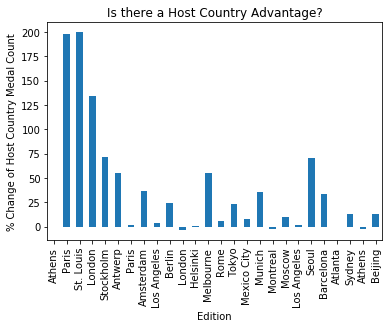

In [92]:
# Import pyplot
import matplotlib.pyplot as plt

# Extract influence['Change']: change
change = influence['Change']

# Make bar plot of change: ax
ax = change.plot(kind='bar')

# Customize the plot to improve readability
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

# Display the plot
plt.show()

# END OF THIS EXCELLENTE COURSE